(138921, 3)
(138778, 3)


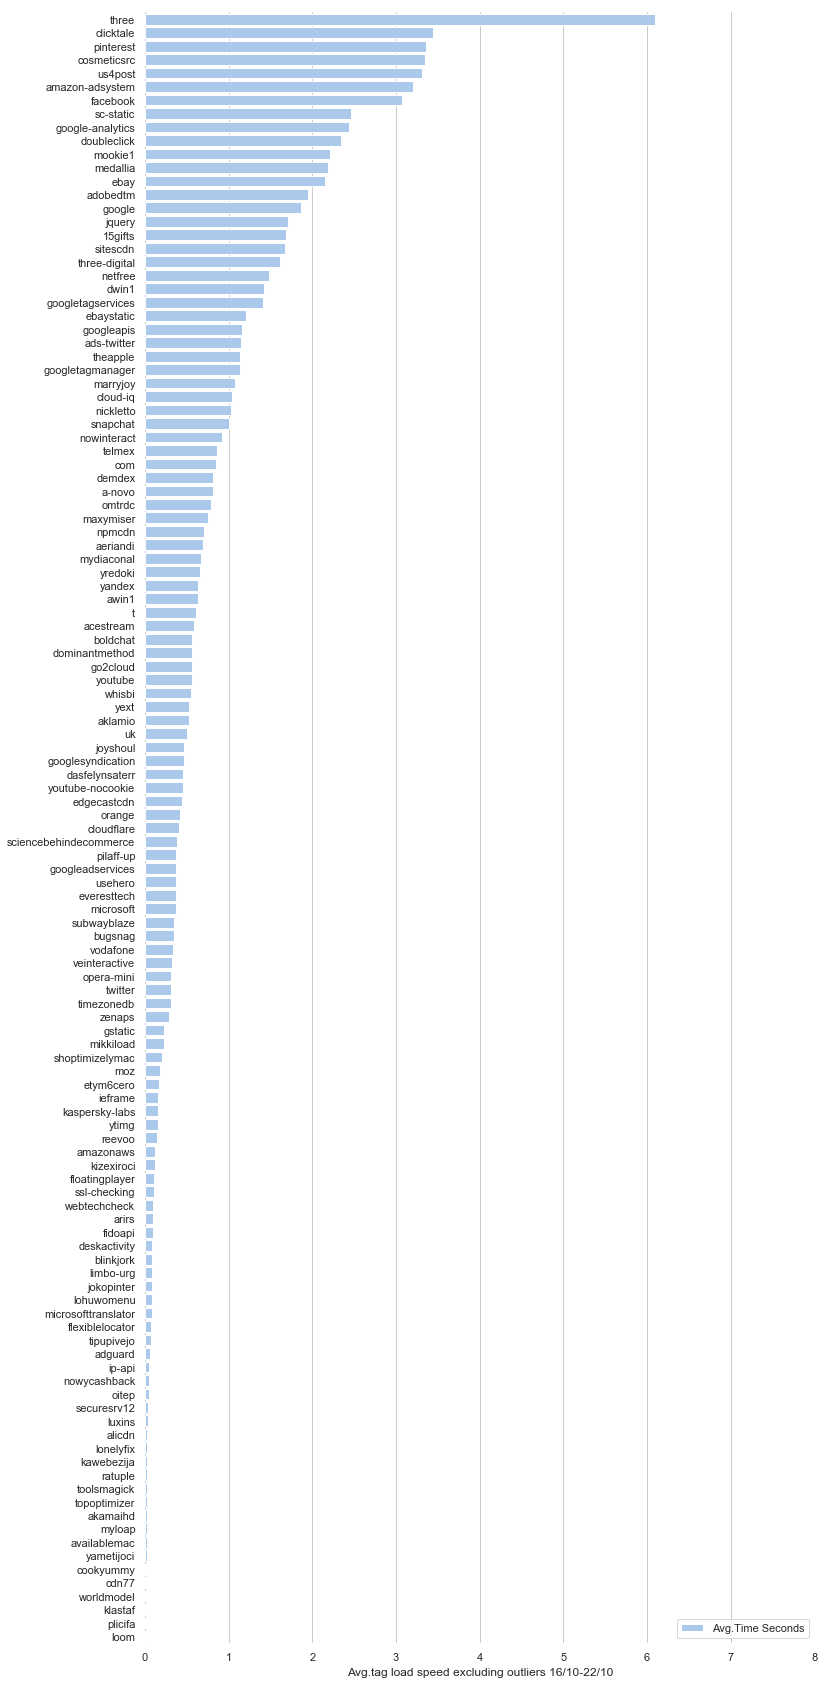

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#BigQuery Extract
'''
SELECT 
CAST(regexp_extract(_Multi_Variate_Value_2_,r'\=(.*)')as float64) as tag_time,
regexp_extract(_Multi_Variate_Value_2_,r'\:(.*?)\|') as tag_name,
regexp_extract(Page_URL__eVar_60___evar60_,r'^[^?]+') as url,
_Multi_Variate_Value_2_, Page_URL__eVar_60___evar60_, Page_URL__eVar_60__Instance__Instance_of_evar60_
FROM `three-data.three.tag7days` 
,
select url, tag_time, tag_name
FROM `three-data.three.tag7daysclean`
WHERE tag_time > 0.00
'''
alldata = pd.read_csv('bqresults_all.csv')
zscore = np.abs(stats.zscore(alldata["tag_time"]))
# Shape of data before removing outliers
print(alldata.shape)
#Removed outliers anything 3 or more standard deviations 
outliers_removed = alldata[(zscore < 3)]
print(outliers_removed.shape)
#Average tag_load time per tag_name and sort and reset index
outliers_removed.groupby(['tag_name']).agg(['mean', 'count'])
calc = (outliers_removed.groupby(['tag_name']).agg([('avg_secs','mean'),('tag_count','count')])
         .reset_index())
new = calc.set_axis(calc.columns.map('_'.join), axis=1, inplace=False).add_suffix('_calc')
tag_time = new.sort_values(['tag_time_avg_secs_calc'], ascending=[False])
tag_time_reset = tag_time.reset_index()
#Set seaborn style
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 30))
# Plot
sns.set_color_codes("pastel")
sns.barplot(x="tag_time_avg_secs_calc", y="tag_name__calc", data=tag_time_reset,
            label="Avg.Time Seconds", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 8), ylabel="",
       xlabel="Avg.tag load speed excluding outliers 16/10-22/10")
sns.despine(left=True, bottom=True)
fig = ax.get_figure()


Text(0, 0.5, 'Avg. Tag Load Speed')

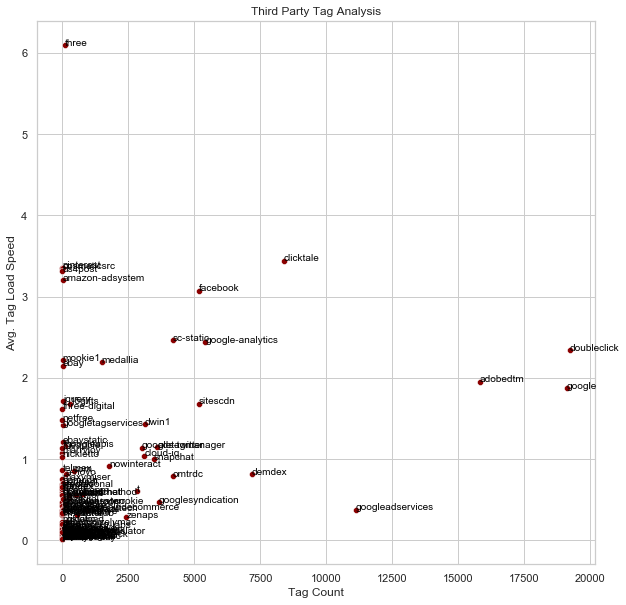

In [6]:
plt.figure(figsize=(10,10))
p1 = sns.scatterplot( x = 'tag_time_tag_count_calc',
       y = 'tag_time_avg_secs_calc',
       data=new, sizes=(500, 500), color = "darkred")

for line in range(0,new.shape[0]):
     p1.text(new.tag_time_tag_count_calc[line]+0.01, new.tag_time_avg_secs_calc[line], 
     new.tag_name__calc[line], horizontalalignment='left', 
     size='small', color='black')

plt.title('Third Party Tag Analysis')
plt.xlabel('Tag Count')
plt.ylabel('Avg. Tag Load Speed')

(0, 10)

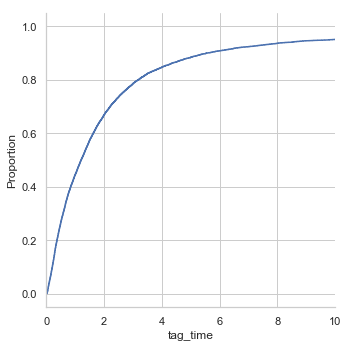

In [10]:
#Clicktale distribution 

sns.set(style="whitegrid")
clicktale = outliers_removed[(outliers_removed.tag_name == "clicktale")]
sns.displot(x="tag_time", kind="ecdf", data = clicktale)
plt.xlim(0, 10)


(0, 10)

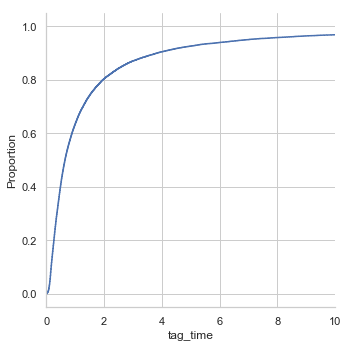

In [11]:
#Doubleclick distribution 
sns.set(style="whitegrid")
clicktale = outliers_removed[(outliers_removed.tag_name == "doubleclick")]
sns.displot(x="tag_time", kind="ecdf", data = clicktale)
plt.xlim(0, 10)
